# Project: TMDB Movie Data Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project is about analysis of the TMDb movie dataset by using Python libraries NumPy, pandas, and Matplotlib. Orginal dataset is published by from Kaggle however in this project cleaned dataset was provided by Udacity. The dataset contains 10000+ movies basic information and some metrics which is helpful to analyze success of these movies like popularity, revenue and vote average. Basic information are like cast, director, keywords, runtime, genres, etc.

Some of the questions will be answered using this analysis are as below:
1. Which year has the highest release of movies? 
2. Movie Popularity Over Years
3. Which Movie Has The Highest Or Lowest Profit?
4. Top 10 profitable movies
5. Which Year Has The Highest Profit Rate?
6. Which Genre Has The Highest Release Of Movies?
7. What kinds of properties are associated with movies that have high revenues?
8. Which Month Released Highest Number Of Movies  And Made The Highest Average Revenue?


In [30]:
#Load Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [31]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

tmdb_data=pd.read_csv("D:\\Learning\\Udacity\\Data Analyst Nanodegree\\Project_2_TMDB Movie Data Analysis\\tmdb-movies.csv")
tmdb_data.head(2)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [32]:
tmdb_data.shape

(10866, 21)

In [33]:
# descriptive statistics for the data set.
tmdb_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From descriptive statistics for the data set we can find outliers in popularity data.Also, there are a lot of zero number in budget and revenue data, so is runtime. Didn't these movies be released? Look at the data in release_year column, I find all movies in the dataset are released becauce the minimum value is 1960 and there is no null value for it. So I assume the zero values in the budget and revenue are missing data. But under the risk that these zero values may be just small values, I preceed to take a look for some zero data content to decide whether it is just a missing value or small value.

In [34]:
#Check column info and missing values
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [35]:
#check nulls in column
tmdb_data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

From the above 2 tables, there are totally 10866 entries and total 21 columns. And there exists some null value in the cast, director, overview and genres columns. But some columns are with a lot of null value rows like homepage, tagline, keywords and production_companies, especially the homepage and tagline columns are even not necessary for answering the question, so we can  drop these columns.

### Data Cleaning 

Based on initial analysis data cleaning will have below steps:
1. Drop unncessary columns : imdb_id,homepage,tagline,production_companies,overview,budget_adj,revenue_adj
2. Remove duplicate rows from the dataset
3. Replace movies which are having zero value of budget and revenue with Null Values
4. Drop the null values in cast, director, genres columns
5. Changing format of release date into datetime format


1. Drop unncessary columns : imdb_id,homepage,tagline,production_companies,overview,budget_adj,revenue_adj

In [36]:

col = ['imdb_id', 'homepage', 'tagline','production_companies' ,'overview', 'budget_adj', 'revenue_adj']
tmdb_data.drop(col, axis=1, inplace=True)
tmdb_data.head(1)


,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


2. Remove duplicate rows from the dataset

In [39]:
sum(tmdb_data.duplicated())

1

In [40]:
#Drop the duplicates
tmdb_data.drop_duplicates(inplace=True)

3. Replace movies which are having zero value of budget and revenue with Null Values

In [43]:
#replace zero values with null values in the budget and revenue column.
tmdb_data['budget'] = tmdb_data['budget'].replace(0, np.NaN)
tmdb_data['revenue'] = tmdb_data['revenue'].replace(0, np.NaN)

4. Drop the null values in cast, director, genres columns

In [44]:
col = ['cast', 'director', 'genres']
tmdb_data.dropna(subset = col, how='any', inplace=True)

5. Changing format of release date into datetime format

In [45]:
#Release date is in string format need to change this in datetime format
tmdb_data['release_date'] = pd.to_datetime(tmdb_data['release_date'])
tmdb_data['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

After completion of cleaning of dataset,data looks ready for further analysis.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : Which year has the highest release of movies?

release_year
2011    532
2012    574
2013    649
2014    682
2015    617
Name: id, dtype: int64


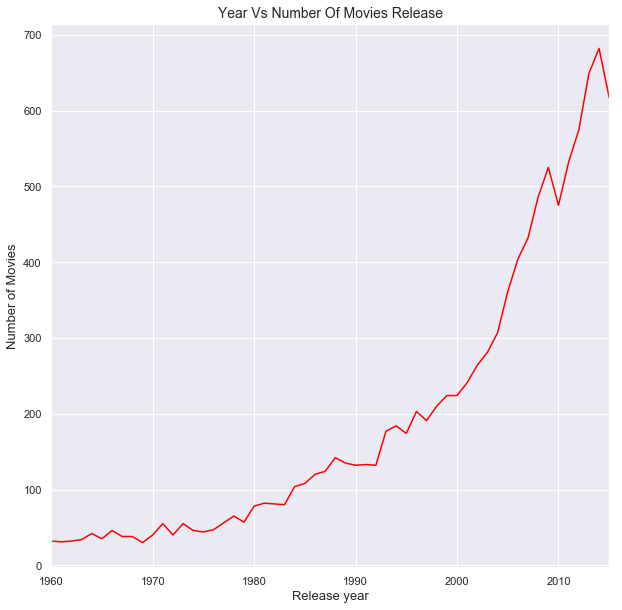

In [116]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

Movie_release=tmdb_data.groupby('release_year')['id'].count()
print(Movie_release.tail());
Movie_release.plot(kind='line',color='red');
plt.title("Year Vs Number Of Movies Release",fontsize = 14);
plt.xlabel('Release year',fontsize = 13);
plt.ylabel('Number of Movies',fontsize = 13);
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("darkgrid")

From above graph we can observe that year 2014 year has the highest release of movies (682) followed by year 2013 (649) and year 2015 (617).

### Research Question 2 : Movie Popularity Over Years

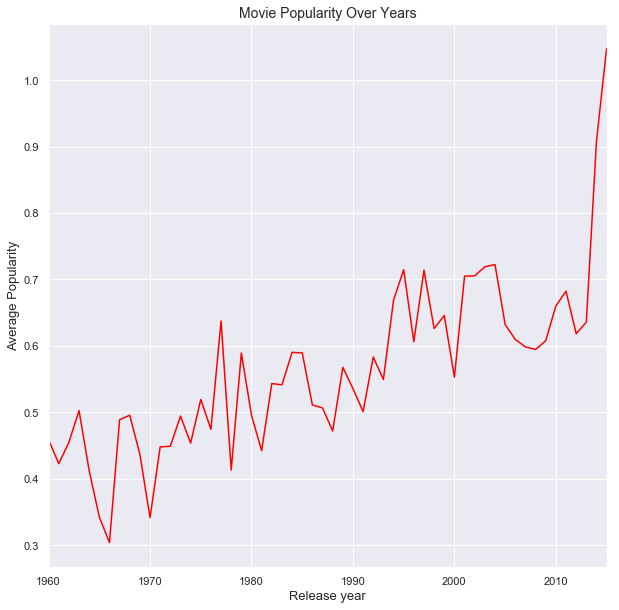

In [115]:
Movie_popularity=tmdb_data.groupby('release_year')['popularity'].mean()
Movie_popularity.plot(kind='line',color='red');
plt.title("Movie Popularity Over Years",fontsize = 14);
plt.xlabel('Release year',fontsize = 13);
plt.ylabel('Average Popularity',fontsize = 13);
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("darkgrid")


From above graph we can observe that movie popularity is growing over the years there are some year like 1982,1988,1992,2000,2011 where popularity is decrease.The trend is reasonable due to the eaiser access of movie information nowadays. Moreover, in the Internet age, people can easily search and gether movie information, even watch the content through different sources.

### Research Question 3 :Which Movie Has The Highest Or Lowest Profit?

In [65]:
tmdb_data['Movie_Profit'] = tmdb_data['revenue'] - tmdb_data['budget']

In [94]:
max_profit=tmdb_data['Movie_Profit'].max()
max_profit_movie = tmdb_data.loc[tmdb_data['Movie_Profit'] == max_profit]
max_profit_movie['original_title']
min_profit=tmdb_data['Movie_Profit'].min()
min_profit_movie = tmdb_data.loc[tmdb_data['Movie_Profit'] == min_profit]b
min_profit_movie['original_title']
print("Movie with Highest Profit " " : ",max_profit_movie['original_title']);
print("Movie with Lowest Profit " " : ",min_profit_movie['original_title']);

Movie with Highest Profit  :  1386    Avatar
Name: original_title, dtype: object
Movie with Lowest Profit  :  2244    The Warrior's Way
Name: original_title, dtype: object


### Research Question 4 :Top 10 profitable movies

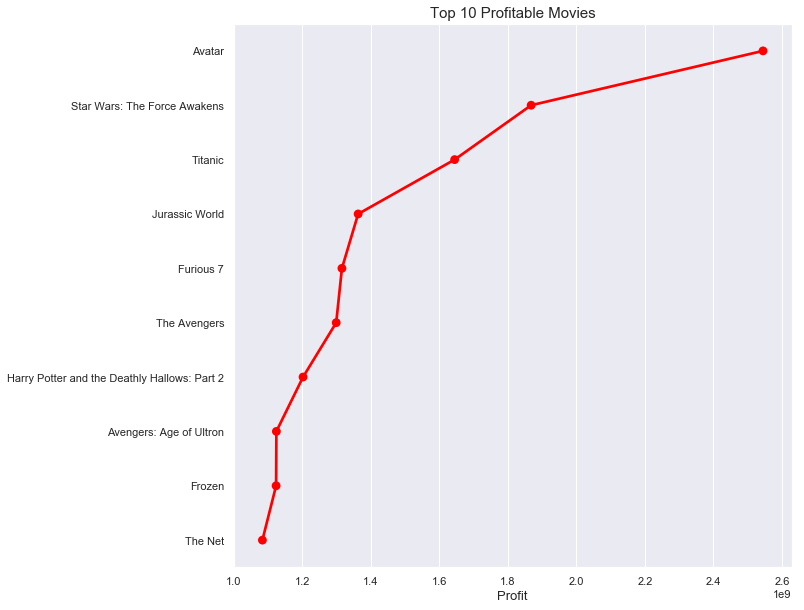

In [114]:
info = pd.DataFrame(tmdb_data['Movie_Profit'].sort_values(ascending = False))
info['original_title'] = tmdb_data['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['Movie_Profit'][:10])

#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x,color='red')

#setup the figure size
sns.set(rc={'figure.figsize':(8,8)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("darkgrid")

### Research Question 5 : Which Year Has The Highest Profit Rate?

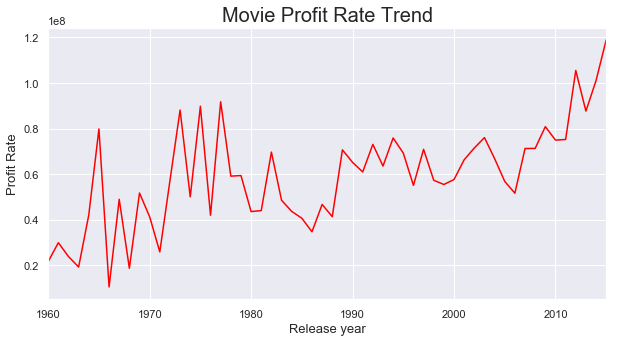

In [112]:
Profit_rate=tmdb_data.groupby('release_year')['Movie_Profit'].mean()
Profit_rate.plot(kind='line',color='red');
plt.title("Movie Profit Rate Trend",fontsize = (20));
plt.xlabel('Release year',fontsize = 13);
plt.ylabel('Profit Rate',fontsize = 13);
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("darkgrid")

From above graph we can observe that movie profit rate is growing over the years there are some year from 1978-2011 where movie profit rate is decrease.

### Research Question 6: Which Genre Has The Highest Release Of Movies?

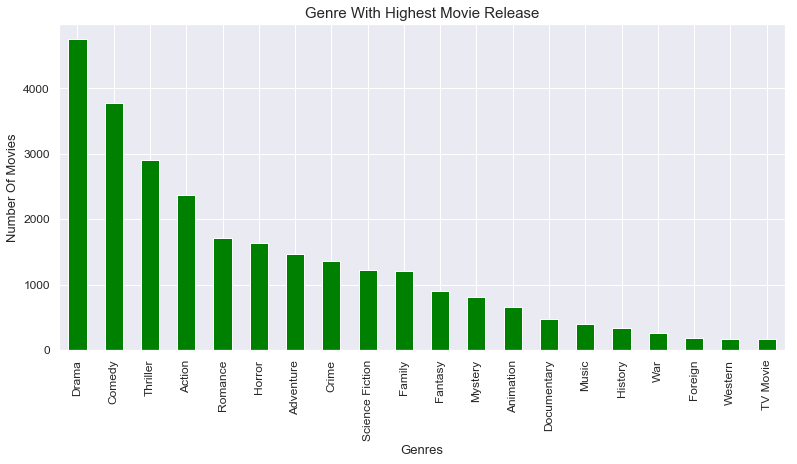

In [125]:
def count_genre(x):
    #concatenate all the rows of the genrs.
    data_plot = tmdb_data[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'bar',figsize = (13,6),fontsize=12,color='green')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Movie Release",fontsize=15)
plt.xlabel('Genres',fontsize=13)
plt.ylabel('Number Of Movies',fontsize= 13)b
sns.set_style("darkgrid")

From above grpah we can observe that drama is most popular genre and TV movie are least popular.

### Research Question 7: What kinds of properties are associated with movies that have high revenues?


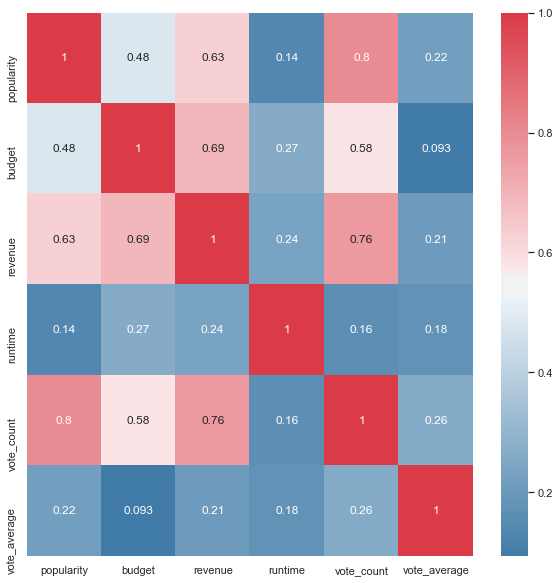

In [134]:
df = pd.DataFrame(tmdb_data,columns=['popularity','budget','revenue','runtime','vote_count','vote_average'])
cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
corrMatrix =df.corr()
sns.heatmap(corrMatrix,cmap=cmap,annot=True)
plt.show()

From correlation matrix map we can observe that there is a good possibility that movies with higher investments result in better revenues(Correlation = 0.69),the popularity of movie is high then the revenue of the movie may be high(Correlation = 0.63) however vote count and runtime dont have relation with movie revenue.

### Research Question 8:Which Month Released Highest Number Of Movies  And Made The Highest Average Revenue?

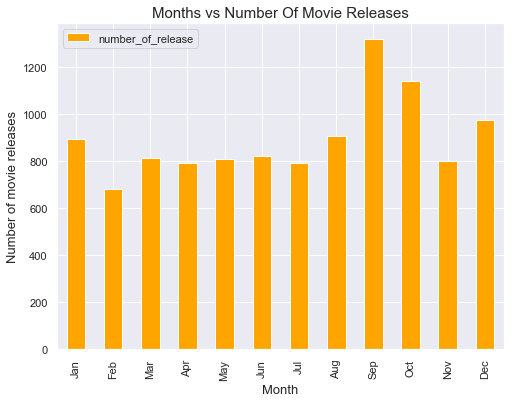

In [153]:
#extract the month number from the release date.
month_release = tmdb_data['release_date'].dt.month

#count the movies in each month using value_counts().
number_of_release = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months

#change the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

#plot the bar graph using plot.
number_of_release.plot(x='month',kind='bar',color='orange',fontsize = 11,figsize=(8,6))

#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)
sns.set_style("darkgrid")

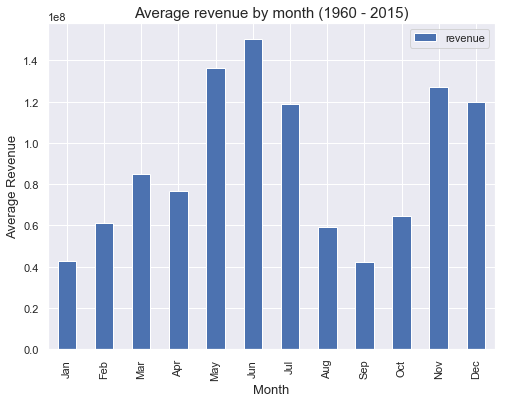

In [155]:
month_release = pd.DataFrame(month_release)

#change the column name of the new dataframe 'month_release'.
month_release.rename(columns = {'release_date':'release_month'},inplace=True)

#add a new column 'revenue' in the dataframe 'month_release'.
month_release['revenue'] = tmdb_data['revenue']

#make the group of the data according to their month and calculate the mean revenue of each month.
mean_revenue  = month_release.groupby('release_month').mean()
mean_revenue['month'] = months

#make the bar plot using pandas plot function.
mean_revenue.plot(x='month',kind='bar',figsize = (8,6),fontsize=11)

#setup the title and lables of the plot.
plt.title('Average revenue by month (1960 - 2015)',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Average Revenue',fontsize = 13)
sns.set_style("darkgrid")

According tp the plot we can say that movie which release in may or june month made the high revenue in comparison of other month release. Or it can be happened because of outliers.

<a id='conclusions'></a>
## Conclusions


Based on analysis performed below conclsuion can be derived:
* Drama is the most popular genre, following by action, comedy and thriller.
* Maximum Number Of Movies Release In year 2014.
* 'Avatar', 'Star Wars' and 'Titanic' are the most profitable movies.
* May,june,november and december are most popular month for releasing movies, if you want to earn more profit.
* Revenue is directly connected to the budget.
* Movies with higher budgets have shown a corresponding increase in the revenues.

### Limitations

* From analysis we are able to find characterstics of high revenue movie which is be not correct everytime however It can be use as reference while releasing movie.
* Vote count are not taken into consideration, so the rating score may be a bias whe the vote number is few.
* Budget and revenue values shown as zero considered as NaN which may have effect on analysis.